# Data Cleansing and Preprocessing

Importing necessary modules

In [1]:
import pandas as pd
!pip install statistics
import statistics 
import numpy as np
import matplotlib.pyplot as plt
!pip install tensorflow
import tensorflow as tf
from sklearn import preprocessing


keras = tf.keras
df = pd.read_csv('Canadian_climate_history.csv')

  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7451 sha256=138b60b6bd4d68bda814b8e7b54aa1efce1966529b7b866195c9dd587c80399c
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b1/b1/0f/60180253bb7de3d88fef59e80f3c9ec4bc2fb2b5a0f5f3995c
Successfully built statistics
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 320.4 MB 29 kB/s s eta 0:00:01     |██████████████████████████████  | 300.3 MB 69.9 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 65 kB 644 kB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 142 kB/s  eta 0:00:01
     |████████████████████████████████| 6.8 MB 41.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 75.2 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 75.6 MB/s eta 0:00:01
     |████████

Looking at the data, we can see it includes `LOCAL_DATE` column and the MEAN_TEMPERATURE and TOTAL_PRECIPITATION columns for many different canadian weather centers. However, we only need the `MEAN_TEMPERATURE_VANCOUVER` and `LOCAL_DATE` columns

In [2]:
df.fillna(df.mean(), inplace=True)
df.head(10)

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,...,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,2.311584,1.246239,6.565997,3.976417,-14.5,0.0,6.675386,...,5.00718,4.10222,-13.1,0.3,9.7,7.1,-0.41871,0.729778,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,2.311584,1.246239,6.565997,3.976417,-11.1,0.0,6.675386,...,5.00718,4.10222,-6.1,0.0,7.8,1.0,-0.41871,0.729778,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,2.311584,1.246239,6.565997,3.976417,-11.1,0.3,6.675386,...,5.00718,4.10222,-6.4,0.5,8.1,0.5,-0.41871,0.729778,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,2.311584,1.246239,6.565997,3.976417,-8.1,0.0,6.675386,...,5.00718,4.10222,-7.2,16.5,7.0,0.8,-0.41871,0.729778,-18.7,0.0
5,06-Jan-1940 00:00:00,-9.8,0.0,2.311584,1.246239,6.565997,3.976417,-11.4,3.8,6.675386,...,5.00718,4.10222,-10.3,0.0,5.0,0.0,-0.41871,0.729778,-18.6,0.0
6,07-Jan-1940 00:00:00,-11.4,0.0,2.311584,1.246239,6.565997,3.976417,-14.2,0.0,6.675386,...,5.00718,4.10222,-18.1,0.0,1.4,0.0,-0.41871,0.729778,-14.8,0.0
7,08-Jan-1940 00:00:00,-11.1,1.0,2.311584,1.246239,6.565997,3.976417,-17.2,0.0,6.675386,...,5.00718,4.10222,-14.5,0.0,1.2,0.0,-0.41871,0.729778,-11.9,0.8
8,09-Jan-1940 00:00:00,-15.6,0.0,2.311584,1.246239,6.565997,3.976417,-13.7,0.3,6.675386,...,5.00718,4.10222,-13.3,0.3,2.2,3.3,-0.41871,0.729778,-12.8,0.5
9,10-Jan-1940 00:00:00,-10.6,1.3,2.311584,1.246239,6.565997,3.976417,-15.3,0.0,6.675386,...,5.00718,4.10222,-9.2,0.0,2.5,0.0,-0.41871,0.729778,-10.9,0.8


Here we create `df_van` using the `LOCAL_DATE` and `MEAN_TEMP_VANCOUVER` columns. 

In [3]:
df_van = (df['LOCAL_DATE'], df['MEAN_TEMPERATURE_VANCOUVER'])
df_van = pd.DataFrame(df_van)
df_van = df_van.transpose()
df_van

,LOCAL_DATE,MEAN_TEMPERATURE_VANCOUVER
0,01-Jan-1940 00:00:00,8.9
1,02-Jan-1940 00:00:00,9.7
2,03-Jan-1940 00:00:00,7.8
3,04-Jan-1940 00:00:00,8.1
4,05-Jan-1940 00:00:00,7
...,...,...
29216,28-Dec-2019 00:00:00,5.3
29217,29-Dec-2019 00:00:00,7.1
29218,30-Dec-2019 00:00:00,7.5
29219,31-Dec-2019 00:00:00,8.4


We look the see the number of nan values in the `df_van` dataset

In [4]:
print(df_van)

                 LOCAL_DATE MEAN_TEMPERATURE_VANCOUVER
0      01-Jan-1940 00:00:00                        8.9
1      02-Jan-1940 00:00:00                        9.7
2      03-Jan-1940 00:00:00                        7.8
3      04-Jan-1940 00:00:00                        8.1
4      05-Jan-1940 00:00:00                          7
...                     ...                        ...
29216  28-Dec-2019 00:00:00                        5.3
29217  29-Dec-2019 00:00:00                        7.1
29218  30-Dec-2019 00:00:00                        7.5
29219  31-Dec-2019 00:00:00                        8.4
29220  01-Jan-2020 00:00:00                        7.8

[29221 rows x 2 columns]


We replace the nan values with the mean of the entire `MEAN_TEMPERATURE_VANCOUVER` column

In [5]:
df_van['MEAN_TEMPERATURE_VANCOUVER'].fillna((df['MEAN_TEMPERATURE_VANCOUVER'].mean()), inplace=True)

We also normalize the `MEAN_TEMPERATURE_VANCOUVER` columns

In [6]:
# Create x, where x the 'scores' column's values as floats
x = df[['MEAN_TEMPERATURE_VANCOUVER']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_van_normal = pd.DataFrame(x_scaled)


We give the normalized dataset the column names of the original non normalized dataset

In [7]:
df_van_normal['LOCAL_DATE'] = df_van['LOCAL_DATE']
df_van_normal.columns = ['MEAN_TEMPERATURE_VANCOUVER', 'LOCAL_DATE']

But there is still one thing to do. We must make the `LOCAL_DATE` column the index, and change it to pandas datetime so its easier to visualize

In [8]:
# convert the 'LOCAL_DATE' column to datetime format 
df_van_normal['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])
# set the 'LOCAL_DATE' column as index
df_van_normal.set_index('LOCAL_DATE', inplace=True)
# Check the format of 'LOCAL_DATE' column 
df_van_normal.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29221 entries, 1940-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MEAN_TEMPERATURE_VANCOUVER  29221 non-null  float64
dtypes: float64(1)
memory usage: 456.6 KB


We now see that the `LOCAL_DATE` is set to the pandas datetime format

In [9]:
df_van_normal

,MEAN_TEMPERATURE_VANCOUVER
LOCAL_DATE,
1940-01-01,0.545455
1940-01-02,0.564103
1940-01-03,0.519814
1940-01-04,0.526807
1940-01-05,0.501166
...,...
2019-12-28,0.461538
2019-12-29,0.503497
2019-12-30,0.512821


We are now ready to do the naive forecasting bit of the project

# Visualizing the Cleaned Data

Using matplot, we can visualize all the normalized data of vancouver temperatures

<Figure size 1152x720 with 0 Axes>

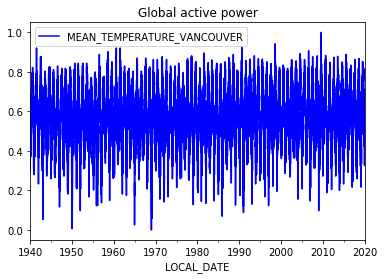

In [10]:
# display the data 
plt.figure(figsize=(16,10))

# all data points
df_van_normal.plot(title='Global active power', color='blue')
plt.show()

All the data is a bit much, so let's only see one year of the normalized mean temperatures in vancouver

<Figure size 1152x720 with 0 Axes>

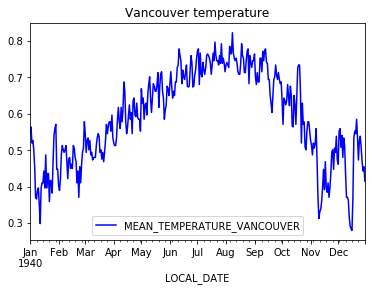

In [11]:
# can plot a slice of daily data
end_days = 365 # 1 year

plt.figure(figsize=(16,10))
df_van_normal[0:end_days].plot(title='Vancouver temperature', color='blue') 
plt.show()

Let's see 5 years of data to get more of a trend in the data. We can see that the temperature goes up by quite a bit in Summer, as expected and goes to a low in winter

<Figure size 1152x720 with 0 Axes>

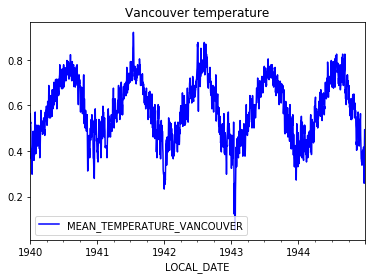

In [12]:
# can plot a slice of daily data
end_days = 365*5 # 1 year*5 = 5 years


plt.figure(figsize=(16,10))
df_van_normal[0:end_days].plot(title='Vancouver temperature', color='blue') 
plt.show()

# Training, Validation and Test data

Here we create a make_time_series function. It makes yearly time series using which we can train our machine learnign models on. 

In [13]:
def make_time_series(df, years, freq='D', start_idx=0):
    '''Creates as many time series as there are complete years. This code
       accounts for the leap year, 2008.
      :param mean_power_df: A dataframe of global power consumption, averaged by day.
          This dataframe should also be indexed by a datetime.
      :param years: A list of years to make time series out of, ex. ['2007', '2008'].
      :param freq: The frequency of data recording (D = daily)
      :param start_idx: The starting dataframe index of the first point in the first time series.
          The default, 16, points to '2017-01-01'. 
      :return: A list of pd.Series(), time series data.
      '''
    
    # store time series
    time_series = []
    
    # store leap year in this dataset
    leap = leap = ('1940', '1944', '1948', '1952', '1956', '1960', '1964', '1968','1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020')

    # create time series for each year in years
    for i in range(len(years)):

        year = str(years[i])

        if(year in leap):
            end_idx = start_idx + 366
        else:
            end_idx = start_idx + 365

        # create start and end datetimes
        t_start = year + '-01-01' # Jan 1st of each year = t_start
        t_end = year + '-12-31' # Dec 31st = t_end

        # get global consumption data
        data = df[start_idx:end_idx]

        # create time series for the year
        index = pd.date_range(start=t_start, end=t_end, freq = freq)
        time_series.append(pd.Series(data=data.values.flatten(), index=index))
        
        start_idx = end_idx
    
    # return list of time series
    return time_series
    
    

We also make a crete_training_series function, which will make training and validation series from our yearly time series created by the make_time_series function

In [14]:
def create_training_series(complete_time_series, prediction_length):
    '''Given a complete list of time series data, create training time series.
       :param complete_time_series: A list of all complete time series.
       :param prediction_length: The number of points we want to predict.
       :return: A list of training time series.
       '''
    # get training series
    time_series_training = []

    for ts in complete_time_series:
        # truncate trailing `prediction_length` pts
        time_series_training.append(ts[:-prediction_length])

    return time_series_training

We make a list of years we want to make a time series of. We will make time series out of the 1940-2009 data and use the rest of the data, start of 2010 - end of 2019 as test 

In [15]:
years = []

for i in range(1940, 2010):
    years.append(i)

We make series using the dataset and the years

In [16]:
train_series = make_time_series(df = df_van_normal, years = years)

Lets plot the first year (Jan-Dec 1940)

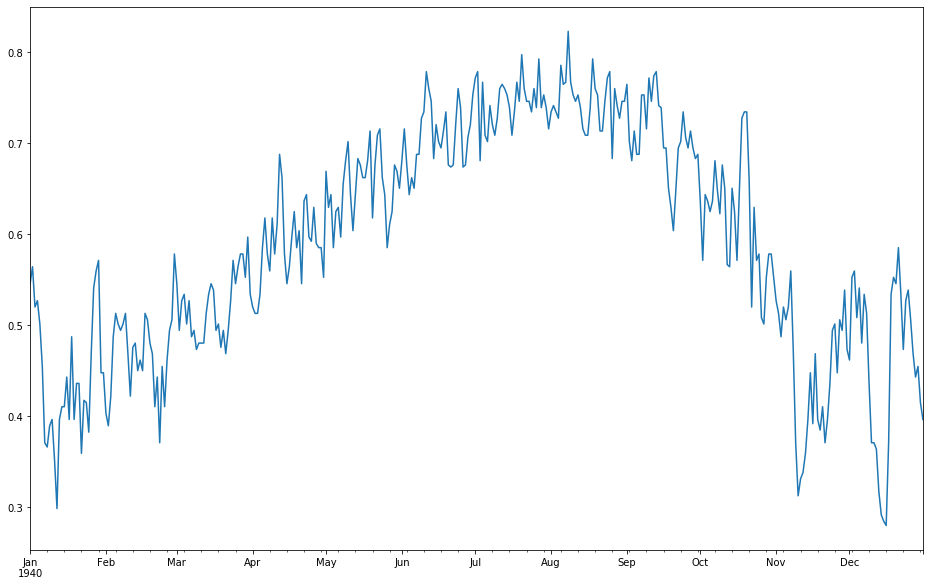

In [17]:
plt.figure(figsize=(16,10))

train_series[0].plot()
plt.show()

We display the first time series created by the function, for the year 1940. The validation period is 30 days long while the training period is 335 days long

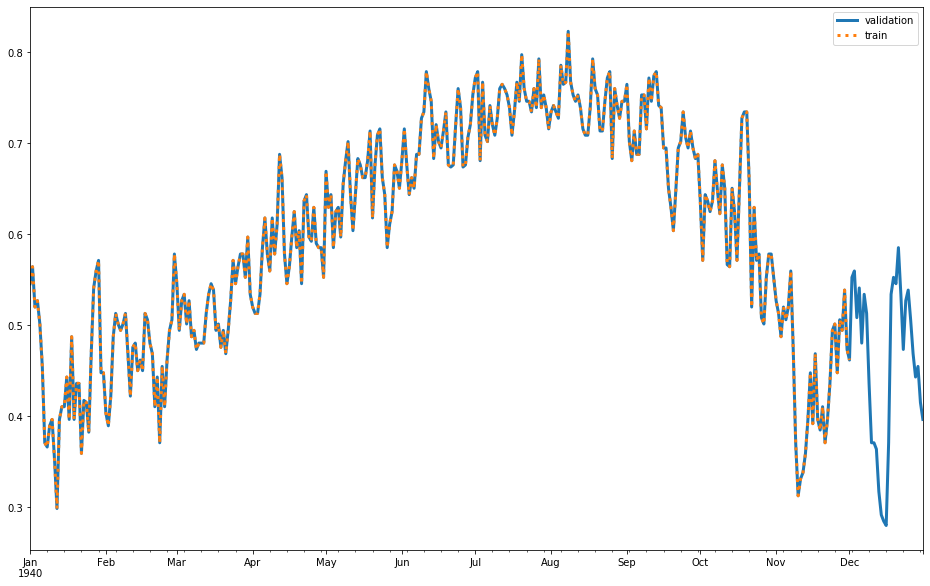

In [18]:
# display train/validation time series
time_series_idx = 0
prediction_length = 30
time_series_training = create_training_series(train_series, prediction_length)

plt.figure(figsize=(16,10))
# test data is the whole time series
train_series[time_series_idx].plot(label='validation', lw=3)
# train data is all but the last prediction pts
time_series_training[time_series_idx].plot(label='train', ls=':', lw=3)

plt.legend()
plt.show()

Making test series

In [19]:
# create time series for the years
df_van_normal = df_van_normal.fillna(df_van_normal.mean())
index = pd.date_range(start='2010-01-01', end='2019-12-31', freq = 'd')     
test_series = (pd.Series(data=df_van_normal[25568:29220].dropna().values.flatten(), index=index))
            
# return time series
test_series
np.isnan(df_van_normal).sum()

MEAN_TEMPERATURE_VANCOUVER    0
dtype: int64

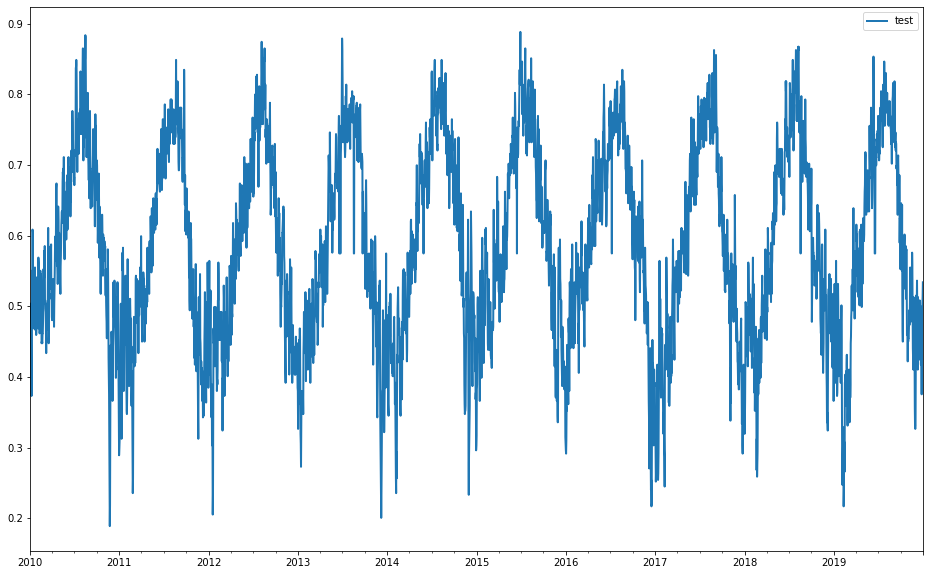

In [20]:
plt.figure(figsize=(16, 10))
# test data is the whole time series
test_series.plot(label='test', lw=2)

plt.legend()
plt.show()

In [21]:
test_years = []

for i in range(2010, 2020):
    test_years.append(i)
    print(i)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [22]:
test_series_sep = make_time_series(df = df_van_normal, years = test_years)

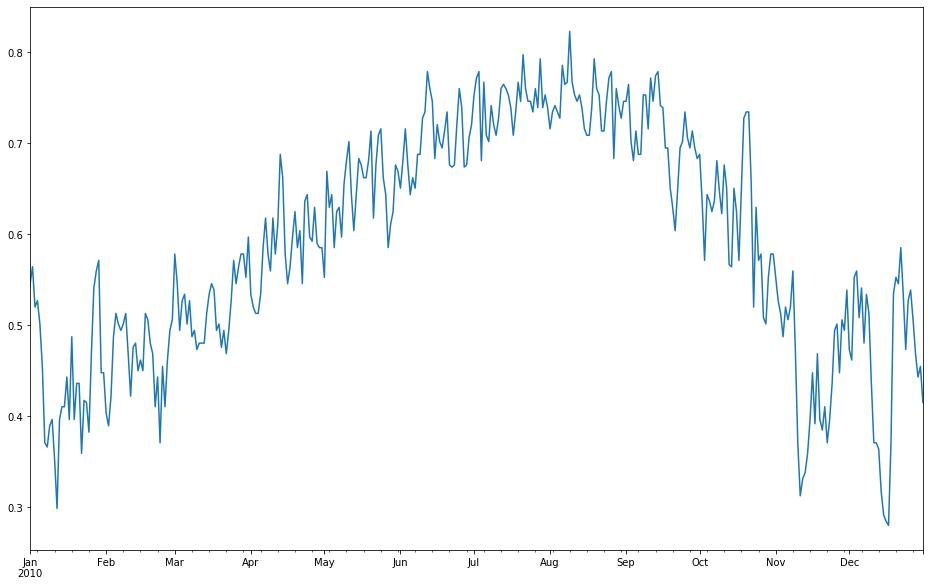

In [23]:
plt.figure(figsize=(16,10))
test_series_sep[0].plot()

# Moving Average

Creating moving average function

In [24]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [25]:
df_van_normal.fillna(df_van_normal.values.mean(), inplace=True)
tester = pd.Series(test_series.values.flatten())
rolled = tester.rolling(window=3)
moving_averages = rolled.mean()

In [26]:
window_size = 3
moving_averages_list = moving_averages.tolist()
without_nans = []
for i in moving_averages_list:
    if np.isnan(i):
        x = 0.5
        without_nans.append(x)
    else:
        without_nans.append(i)

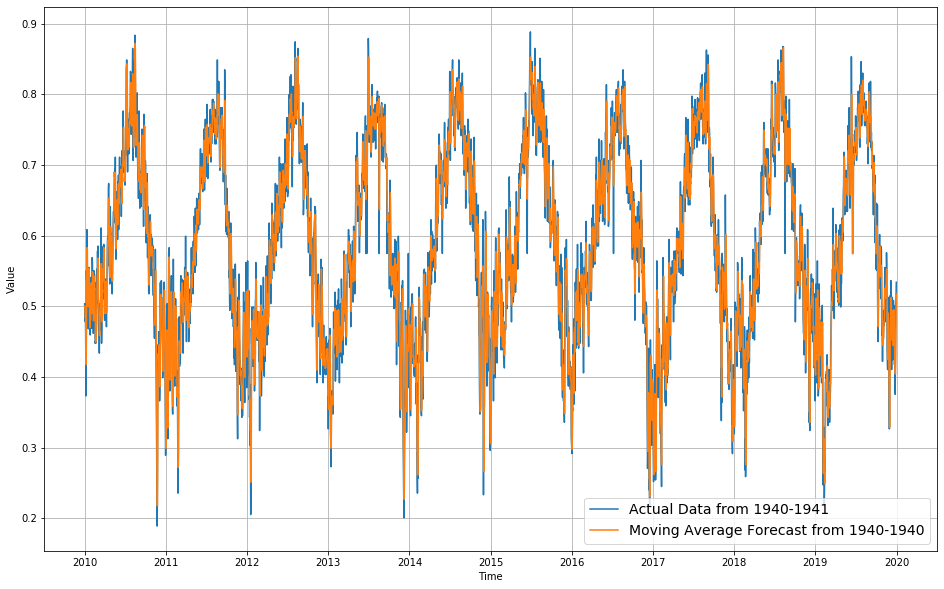

In [27]:
#keras.metrics.mean_squared_error(x_valid, moving_avg).numpy()
plt.figure(figsize=(16,10))

#plt.plot(df_van_normal.index[0:366], df_van_normal[0:366])
#plt.plot(df_van_normal.index[0:366], without_nans)
plot_series(df_van_normal[25568:29220].index, df_van_normal[25568:29220], label='Actual Data from 1940-1941')
plot_series(df_van_normal[25568:29220].index, without_nans, label='Moving Average Forecast from 1940-1940')

In [28]:
keras.metrics.mean_squared_error(test_series, without_nans).numpy()

0.0008999716

# Machine Learning

In [29]:
def series_to_json_obj(ts):
    '''Returns a dictionary of values in DeepAR, JSON format.
       :param ts: A single time series.
       :return: A dictionary of values with "start" and "target" keys.
       '''
    # get start time and target from the time series, ts
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    return json_obj

In [30]:
series_to_json_obj(train_series[0])

{'start': '1940-01-01 00:00:00',
 'target': [0.5454545454545455,
  0.5641025641025641,
  0.5198135198135199,
  0.5268065268065268,
  0.5011655011655012,
  0.4545454545454546,
  0.3706293706293707,
  0.365967365967366,
  0.3892773892773893,
  0.39627039627039634,
  0.35198135198135205,
  0.2983682983682984,
  0.39627039627039634,
  0.4102564102564103,
  0.4102564102564103,
  0.44289044289044294,
  0.39627039627039634,
  0.4871794871794872,
  0.39627039627039634,
  0.43589743589743596,
  0.43589743589743596,
  0.35897435897435903,
  0.41724941724941733,
  0.41491841491841497,
  0.38228438228438233,
  0.46853146853146854,
  0.5407925407925408,
  0.5594405594405595,
  0.5710955710955712,
  0.4475524475524476,
  0.4475524475524476,
  0.4032634032634033,
  0.3892773892773893,
  0.42191142191142195,
  0.4871794871794872,
  0.5128205128205129,
  0.5011655011655012,
  0.4941724941724942,
  0.5011655011655012,
  0.5128205128205129,
  0.46853146853146854,
  0.42191142191142195,
  0.47552447552447

In [31]:
# import json for formatting data
import json
import os # and os for saving

def write_json_dataset(time_series, filename): 
    with open(filename, 'wb') as f:        # for each of our times series, there is one JSON line

        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
    print(filename + ' saved.')

In [32]:
# save this data to a local directory
data_dir = 'json_temp_data'

# make data dir, if it does not exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [33]:
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

# write train/test JSON files
write_json_dataset(time_series_training, train_key)        
write_json_dataset(train_series, test_key)

json_temp_data/train.json saved.
json_temp_data/test.json saved.


In [34]:
import boto3
import sagemaker
from sagemaker import get_execution_role

In [35]:
# session, role, bucket
sagemaker_session = sagemaker.Session()
role = get_execution_role()

bucket = sagemaker_session.default_bucket()


In [36]:
# general prefix
prefix='deepar-temp-data'

# *unique* train/test prefixes
train_prefix   = '{}/{}'.format(prefix, 'train')
test_prefix    = '{}/{}'.format(prefix, 'test')

# uploading data to S3, and saving locations
train_path  = sagemaker_session.upload_data(train_key, bucket=bucket, key_prefix=train_prefix)
test_path   = sagemaker_session.upload_data(test_key,  bucket=bucket, key_prefix=test_prefix)

In [37]:
# check locations
print('Training data is stored in: '+ train_path)
print('Test data is stored in: '+ test_path)

Training data is stored in: s3://sagemaker-us-west-1-560434839557/deepar-temp-data/train/train.json
Test data is stored in: s3://sagemaker-us-west-1-560434839557/deepar-temp-data/test/test.json


In [38]:
from sagemaker.amazon.amazon_estimator import get_image_uri

image_name = get_image_uri(boto3.Session().region_name, # get the region
                           'forecasting-deepar') # specify image


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


In [39]:
from sagemaker.estimator import Estimator

# dir to save model artifacts
s3_output_path = "s3://{}/{}/output".format(bucket, prefix)

# instantiate a DeepAR estimator
estimator = Estimator(sagemaker_session=sagemaker_session,
                      image_name=image_name,
                      role=role,
                      train_instance_count=1,
                      train_instance_type='ml.c5.xlarge',
                      output_path=s3_output_path
                      )

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [40]:
freq='D'
prediction_length=166 # days
context_length=4 # days, same as prediction_length

hyperparameters = {
    "epochs": "263",
    "time_freq": freq,
    "prediction_length": str(prediction_length),
    "context_length": str(context_length),
    "num_cells": "177",
    "num_layers": '2',
    "mini_batch_size": "5000",
    "learning_rate": "0.01",
    "dropout_rate":'0.10',
    'embedding_dimension':'10',
    '_num_gpus':'auto',
    'test_quantiles':'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]',
    '_tuning_objective_metric': 'test:RMSE',
    'num_eval_samples': '100',
    '_num_kv_servers': 'auto',
    'mini_batch_size': '208',
    'likelihood': 'student-t',
    'num_dynamic_feat': 'auto', 
    'cardinality': 'auto', 
    '_num_gpus': 'auto', 
    'prediction_length': '166', 
    'context_length': '4', 
    '_kvstore': 'auto'}

In [41]:
# set the hyperparams
estimator.set_hyperparameters(**hyperparameters)

In [49]:
%%time
# train and test channels
data_channels = {
    "train": train_path,
    "test": test_path
}

# fit the estimator
estimator.attach('forecasting-deepar-2020-09-22-22-16-38-084')

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


2020-09-23 00:13:18 Starting - Preparing the instances for training
2020-09-23 00:13:18 Downloading - Downloading input data
2020-09-23 00:13:18 Training - Training image download completed. Training in progress.
2020-09-23 00:13:18 Uploading - Uploading generated training model
2020-09-23 00:13:18 Completed - Training job completedArguments: train
[09/22/2020 22:19:20 INFO 139802906941248] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[09/22/2020 

In [54]:
estimator = sagemaker.estimator.Estimator.attach('forecasting-deepar-2020-09-22-22-16-38-084')

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


2020-09-23 00:13:18 Starting - Preparing the instances for training
2020-09-23 00:13:18 Downloading - Downloading input data
2020-09-23 00:13:18 Training - Training image download completed. Training in progress.
2020-09-23 00:13:18 Uploading - Uploading generated training model
2020-09-23 00:13:18 Completed - Training job completedArguments: train
[09/22/2020 22:19:20 INFO 139802906941248] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[09/22/2020 

In [55]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    content_type="application/json")# specify that it will accept/produce JSON

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
Using already existing model: forecasting-deepar-2020-09-22-22-16-38-084


-------------!

In [56]:
def json_predictor_input(input_ts, num_samples=50, quantiles=['0.1', '0.5', '0.9']):
    '''Accepts a list of input time series and produces a formatted input.
       :input_ts: An list of input time series.
       :num_samples: Number of samples to calculate metrics with.
       :quantiles: A list of quantiles to return in the predicted output.
       :return: The JSON-formatted input.
       '''
    # request data is made of JSON objects (instances)
    # and an output configuration that details the type of data/quantiles we want
    
    instances = []
    for k in range(len(input_ts)):
        # get JSON objects for input time series
        instances.append(series_to_json_obj(input_ts[k]))

    # specify the output quantiles and samples
    configuration = {"num_samples": num_samples, 
                     "output_types": ["quantiles"], 
                     "quantiles": quantiles}

    request_data = {"instances": instances, 
                    "configuration": configuration}

    json_request = json.dumps(request_data).encode('utf-8')
    
    return json_request

In [57]:
predictor

In [58]:
# helper function to decode JSON prediction
def decode_prediction(prediction, encoding='utf-8'):
    '''Accepts a JSON prediction and returns a list of prediction data.
    '''
    prediction_data = json.loads(prediction.decode(encoding))
    prediction_list = []
    for k in range(len(prediction_data['predictions'])):
        prediction_list.append(pd.DataFrame(data=prediction_data['predictions'][k]['quantiles']))
    return prediction_list

In [59]:
# get all input and target (test) time series
#input_ts = time_series_training
#target_ts = train_series

# get formatted input time series
#json_input_ts = json_predictor_input(input_ts)

# get the prediction from the predictor
#json_prediction = predictor.predict(json_input_ts)

In [60]:
transformer = estimator.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')
transformer.transform(test_path, split_type='Line')
transformer.wait()

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
Using already existing model: forecasting-deepar-2020-09-22-22-16-38-084


.................................Arguments: serve
Arguments: serve
No handlers could be found for logger "root"
[09/23/2020 23:12:19 INFO 139690717136704] Estimated memory required per model 85MB.
[09/23/2020 23:12:19 INFO 139690717136704] Estimated available memory 14806MB.
[09/23/2020 23:12:19 INFO 139690717136704] Estimated maximum number of workers for the available memory is 173.
[09/23/2020 23:12:19 INFO 139690717136704] Using 4 workers
[09/23/2020 23:12:19 INFO 139690717136704] loading entry points
[09/23/2020 23:12:19 INFO 139690717136704] Prediction endpoint operating in batch mode
[09/23/2020 23:12:19 INFO 139690717136704] loaded request iterator application/jsonlines
[09/23/2020 23:12:19 INFO 139690717136704] loaded response encoder application/jsonlines
[09/23/2020 23:12:19 INFO 139690717136704] loaded model class model
[09/23/2020 23:12:19 WARNING 139690717136704] Requesting context without setting the requested num of gpus. Using 'auto'
[09/23/2020 23:12:19 INFO 139690717

In [61]:
!aws s3 cp --recursive $transformer.output_path $data_dir

download: s3://sagemaker-us-west-1-560434839557/forecasting-deepar-2020-09-22-22-16-38--2020-09-23-23-06-57-282/test.json.out to json_temp_data/test.json.out


In [62]:
import string
import re

In [66]:
predictions = pd.read_json(os.path.join(data_dir, 'test.json.out'), lines=True)

'''i = 0
for datapoint in list(predictions):    
    for character in str(datapoint):
        predictions[i] = str(datapoint).replace(';','')
        predictions[i] = str(datapoint).replace(']','')
        predictions[i] = str(datapoint).replace('[','')
        predictions[i] = str(datapoint).replace('(','')
        i+=1

predictions.apply(lambda x: float(x))

#predictions = [round(num) for num in predictions.squeeze().values]'''
del predictions[0]
predictions


ValueError: Unexpected character found when decoding array value (2)

In [ ]:
predictions = predictions.transpose() 
#predictions.index = df_van_normal[25568:29220].index
predictions

In [ ]:
predictions[0] = [str(x).strip('}') for x in predictions[0].values]
predictions[0] = [str(x).strip('{') for x in predictions[0].values]
predictions[0] = [str(x).strip('[') for x in predictions[0].values]
predictions[0] = [str(x).strip(']') for x in predictions[0].values]
predictions[0] = [str(x).strip('{') for x in predictions[0].values]
predictions[0] = [str(x).strip('}') for x in predictions[0].values]
predictions[0] = [str(x).strip(':') for x in predictions[0].values]

predictions[[0]]
#del predictions[0][166]

In [ ]:
#predictions.dtypes

In [ ]:
#print('test')

In [ ]:
'''index = 0
for i in predictions:
    predictions[0] = float
    index += 1
print("done")'''

In [ ]:
predictions[0].astype('float')

In [ ]:
#print(predictions[predictions[0]=='0.1:[0.3973058462'].index.values)

In [ ]:
#predictions.dtypes

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
predictions[0]

In [ ]:
predictions.plot()

In [ ]:
for i in range(len(predictions)):
    print(predictions[i][predictions[i].str.isdigit()])

In [ ]:
predictions.columns[predictions.isin(['0.7107105851]']).any()]

In [ ]:
# get quantiles/predictions
#prediction_list = decode_prediction(data_dir)
#prediction_data = json.loads(json_prediction.decode('utf-8'))

# should get a list of 30 predictions 
# with corresponding quantile values
#print(prediction_list[0])

In [ ]:
# display the prediction median against the actual data
def display_quantiles(prediction_list, target_ts=None):
    # show predictions for all input ts
    for k in range(len(prediction_list)):
        plt.figure(figsize=(12,6))
        # get the target month of data
        if target_ts is not None:
            target = target_ts[k][-prediction_length:]
            plt.plot(range(len(target)), target, label='target')
        # get the quantile values at 10 and 90%
        p10 = prediction_list[k]['0.1']
        p90 = prediction_list[k]['0.9']
        # fill the 80% confidence interval
        plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='80% confidence interval')
        # plot the median prediction line
        prediction_list[k]['0.5'].plot(label='prediction median')
        plt.legend()
        plt.show()

In [ ]:
# display predictions
#prediction_list[0]['0.5'].plot()
#df_van_normal[0:166].plot()
plot_series(df_van_normal[0:166].index, df_van_normal[0:166], label='Actual Data from 1940-1941')
plot_series(df_van_normal[0:166].index, prediction_list[0]['0.5'], label='Moving Average Forecast from 1940-1940')

In [ ]:
target_ts[0].plot()

In [ ]:
prediction_list[0].plot()

In [ ]:

# store time series
time_series = []
    
    # store leap year in this dataset
    leap = leap = ('1940', '1944', '1948', '1952', '1956', '1960', '1964', '1968','1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020')

    # create time series for each year in years
    for i in range(len(years)):

        year = str(years[i])

        if(year in leap):
            end_idx = start_idx + 366
        else:
            end_idx = start_idx + 365

        # create start and end datetimes
        t_start = year + '-01-01' # Jan 1st of each year = t_start
        t_end = year + '-12-31' # Dec 31st = t_end

        # get global consumption data
        data = df[start_idx:end_idx]

        # create time series for the year
        index = pd.date_range(start=t_start, end=t_end, freq = freq)
        time_series.append(pd.Series(data=data.values.flatten(), index=index))
        
        start_idx = end_idx
    
    # return list of time series
    return time_series

In [ ]:
keras.metrics.mean_squared_error(train_series[0][0:166], prediction_list[0]['0.5']).numpy()

In [ ]:
train_series[0][0:166]

In [ ]:
print('beans')

In [ ]:
predictions[116130] = 0.6367511153
predictions[165] = 0.6951569319
predictions[166] = 0.4669067562
predictions[331] = 0.674339354
predictions[332] = 0.4145525098
predictions[497] = 0.537148118
predictions[498] = 0.537148118